In [1]:
TLorentzVector target(0.0, 0.0, 0.0, 0.938);
TLorentzVector beam(0.0, 0.0, .65, .65);
TLorentzVector W = beam + target;

In [2]:
W

(TLorentzVector &) Name: TLorentzVector Title: A four vector with (-,-,-,+) metric


In [6]:
Double_t masses[3] = { 0.938, 0.139, 0.139 };

In [7]:
TGenPhaseSpace event;

In [8]:
event.SetDecay(W, 3, masses);

In [9]:
TH2F *h2 = new TH2F("h2", "h2", 50,1.1,1.8, 50,1.1,1.8);

In [10]:
for (Int_t n=0; n<100000; n++) {
    Double_t weight = event.Generate();
    TLorentzVector *pProton = event.GetDecay(0);
    
    TLorentzVector *pPip = event.GetDecay(1);
    TLorentzVector *pPim = event.GetDecay(2);
    auto pPPip = *pProton + *pPip;
    auto pPPim = *pProton + *pPim;
z    
    h2 -> Fill(pPPip.M2(), pPPim.M2(), weight);
}

In [11]:
TCanvas *tC = new TCanvas("tC", "tC", 1000, 600);

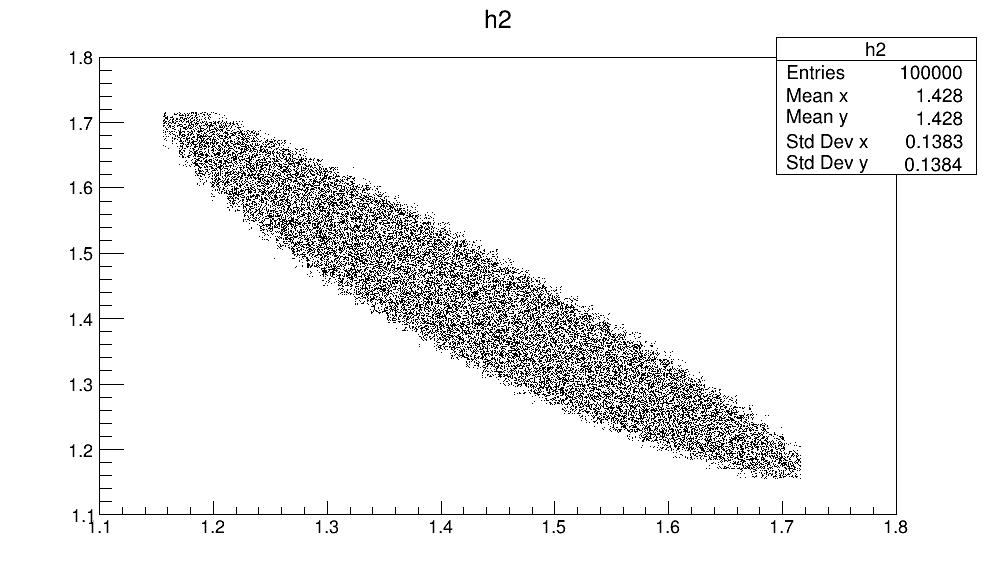

In [13]:
tC->cd(1);
h2->Draw();
tC->Draw();

In [16]:
auto *hx = h2->ProjectionX();
auto *hy = h2->ProjectionY();

In [17]:
tC = new TCanvas("tC2", "tC2", 1000, 600);
tC->Divide(2,1);

In [18]:
tC->cd(1);
hx->Draw();
tC->cd(2);
hy->Draw();

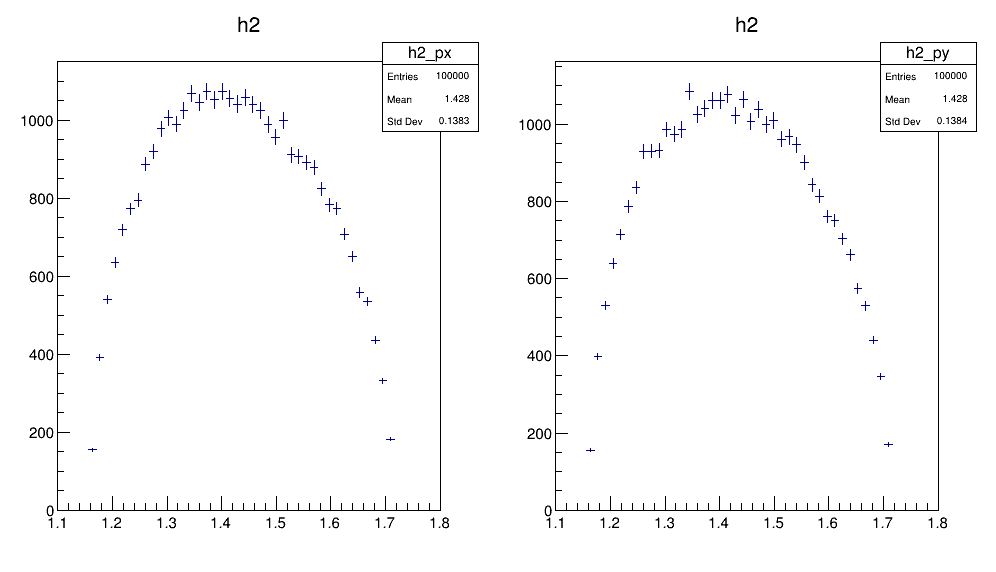

In [19]:
tC->Draw();